## DARWIN SiPM simulation## 

In [1]:
#
# import the SiPM classes
#
from SiPM import *
# for plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Define general geometry parameters ###

In [2]:
# z position of the in-plane SiPMs
z_plane = 10
# radius of the cyinder for SiPMs at the side
r_cylinder = 22
# radius of a SiPM - I assume circular SiPMs with a radius to make the area correspond to a 3x3mm2 square.
r_sipm = 1.6925
# make an instant of the geometry class
geo = GeoParameters(z_plane=z_plane, r_cylinder=r_cylinder, r_sipm=r_sipm)

### Define the geometry of the silicon PMs ###

Add the SiPMs to the geometry

In [3]:
inch = 25.4 # mm

# generate a square array of SiPMs
for x in np.arange(0,5*inch,10):
    for y in np.arange(0,5*inch,10):
        sipm = SiPM(type="plane",position=[x,y,z_plane],qeff=1.)
        geo.add_sipm(sipm)

### Simulate the SiPM acceptance ###

* uv_position is the position where the UV photons are generated
* n_mc is the number of MC photons

In [4]:
#sim = Simulator(geo=geo,uv_position=[30.4,37.6,0],n_mc=100000)
sim = Simulator(geo=geo,uv_position=[15.,33.,0],n_mc=100000)

sim.generate_events()

generated  0  events
Number of SiPMs =  169  Generated hits from x= [15. 33.  0.]
 0  (x,y,z) = ( 0.0,  0.0, 10.0) p(hit) = 0.00015  qe = 1.000
 1  (x,y,z) = ( 0.0, 10.0, 10.0) p(hit) = 0.00027  qe = 1.000
 2  (x,y,z) = ( 0.0, 20.0, 10.0) p(hit) = 0.00062  qe = 1.000
 3  (x,y,z) = ( 0.0, 30.0, 10.0) p(hit) = 0.00129  qe = 1.000
 4  (x,y,z) = ( 0.0, 40.0, 10.0) p(hit) = 0.00093  qe = 1.000
 5  (x,y,z) = ( 0.0, 50.0, 10.0) p(hit) = 0.00051  qe = 1.000
 6  (x,y,z) = ( 0.0, 60.0, 10.0) p(hit) = 0.00017  qe = 1.000
 7  (x,y,z) = ( 0.0, 70.0, 10.0) p(hit) = 0.00008  qe = 1.000
 8  (x,y,z) = ( 0.0, 80.0, 10.0) p(hit) = 0.00005  qe = 1.000
 9  (x,y,z) = ( 0.0, 90.0, 10.0) p(hit) = 0.00002  qe = 1.000
10  (x,y,z) = ( 0.0, 100.0, 10.0) p(hit) = 0.00000  qe = 1.000
11  (x,y,z) = ( 0.0, 110.0, 10.0) p(hit) = 0.00003  qe = 1.000
12  (x,y,z) = ( 0.0, 120.0, 10.0) p(hit) = 0.00000  qe = 1.000
13  (x,y,z) = (10.0,  0.0, 10.0) p(hit) = 0.00023  qe = 1.000
14  (x,y,z) = (10.0, 10.0, 10.0) p(hit) = 0.000

### Emulate events and reconstruct the position ###

* n_event = number of events to emulate
* n_uv = number of UV photons assumed for the S2 signal

In [5]:
%load_ext snakeviz

In [6]:
%%time
rec = Reconstruction(sim=sim, alpha0=0.)
df = rec.emulate_events(n_uv=125000,n_event=1000,n_min=0,method="LINEAR",plot=False,nbins=100,range=((-20,20),(-20,40)))

generated  0  events


C:\Users\aukep\surfdrive\xams\SiPM\LinPosFit.py:165: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 1d, C))
  result = np.dot(minv, g)


generated  100  events
generated  200  events
generated  300  events
generated  400  events
generated  500  events
generated  600  events
generated  700  events
generated  800  events
generated  900  events
reconstruction done
Wall time: 7.44 s


# Plots from here ...... ###

1D distribution of reconstructed x and y position

N entry: 1000
<xr> =  14.931027762038266  +/- 0.0053221637329523164  mm
    rms_x =  0.16830159476473458  mm
<yr> =  33.14024915936888  +/- 0.005191941535353179  mm
    rms_y =  0.16418360730147671  mm


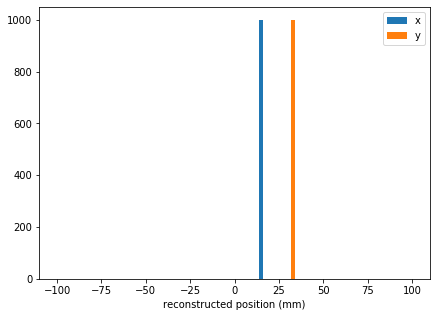

In [7]:
a = rec.plot(type="res",bins=100,range=(-100,100))

2D distribution of y as a function of x

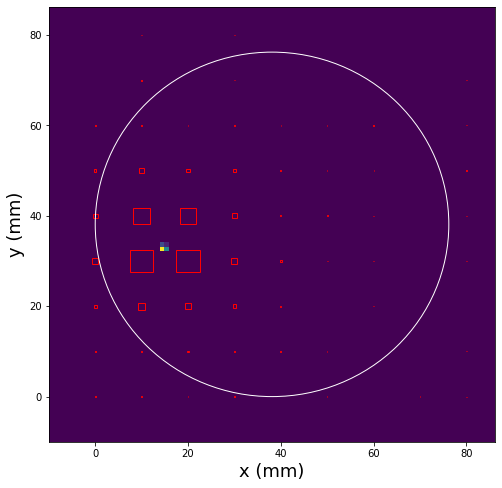

In [8]:
inch = 25.4
ax = rec.plot(type="xy",range=((-10,3*inch+10),(-10,3*inch+10)))
#ax = rec.plot(type="xy",range=((-10,10),(40,60)))


# add outline of a single 3" PMT
c1 = plt.Circle(radius=3*inch/2,xy=(3*inch/2,3*inch/2),fill=False,color='white')
ax.add_artist(c1)

Distribution of reconstructed UV intensity

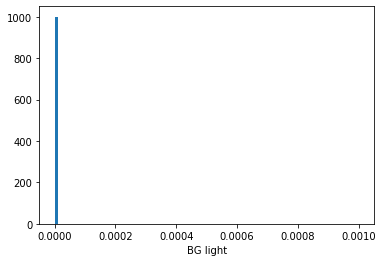

In [9]:
rec.plot(type="alpha",range=(0,0.001))

 N(UV) reco =  125872.07668028919  +/- 62.73300658391849


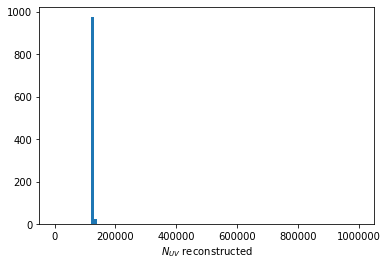

In [10]:
rec.plot(type="intensity",range=(0,1000000))